In [1]:
%run Company2CoursesPreprocessing.ipynb

In [2]:
#!pip install pygal
#!pip install plotly.express
#!pip install plotly
import pygal
#import plotly.express as px
#from pygal.style import Style
#import plotly.graph_objects as go
from math import pi

In [3]:
dfCourseGradeAvgTemp = dfCourseGradeAvg
dfCourseGradeAvgTemp

,basic_electrical_engineering,unix_system_programming,engineering_mechanics,compiler_design,object_oriented_modeling_and_design,project_work,web_technologies_ii,design_and_analysis_of_algorithms,problem_solving_with_c,introduction_to_software_testing,...,design_of_machine_elements_ii,principles_of_flight,basics_of_aerospace_engineering,mechanics_of_machines_and_mechanisms,heat_transfer,mechanics_of_solids,hands_on_course_on_digital_system_simulation_and_synthesis,linear_system,embedded_programming_with_arduino,adaptive_system
CompanyName_New,,,,,,,,,,,,,,,,,,,,,
accenture,3.600000,0.0,3.800000,3.500000,3.750000,4.25,2.750000,3.750000,3.800000,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airasia technology centre,5.000000,0.0,5.000000,4.000000,5.000000,5.00,5.000000,6.000000,5.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
akamai technologies,4.636364,4.0,5.090909,4.909091,4.666667,6.00,5.090909,5.545455,5.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amadeus software labs,4.571429,0.0,4.857143,5.333333,0.000000,0.00,5.000000,4.333333,4.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
amagi,5.000000,0.0,5.500000,4.500000,0.000000,0.00,5.000000,4.500000,4.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amazon,5.166667,0.0,5.000000,5.000000,5.000000,6.00,5.000000,5.600000,5.333333,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
analog devices,3.000000,0.0,6.000000,0.000000,0.000000,0.00,0.000000,0.000000,4.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
app dynamics,4.500000,0.0,5.000000,5.000000,0.000000,0.00,5.500000,5.500000,5.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cisco systems,4.285714,0.0,4.785714,4.750000,5.000000,5.50,5.166667,5.000000,5.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [4]:
df = dfCourseGradeAvgTemp.round(0) 

In [5]:
grade_mapping = { 6:"S", 5:"A", 4:"B", 3:"C", 2:"D", 1:"E", 0:"NA"}

In [6]:
df_grade = df.stack().map(grade_mapping).unstack()

In [26]:
def change_grade(l):
    grade_map = {'F':0, 'E':1, 'D':2, 'C':3, 'B':4, 'A':5, 'S':6}
    for i in range(0,len(l)):
        l[i] = l[i].upper()
        l[i] = grade_map[l[i]]
    return l

def list_course_change(l):
    for i in range(0,len(l)):
        l[i] = l[i].upper().replace("_"," ")
    return l

Enter Company Name: samsung
enter grade in course software_engineering: a
enter grade in course internship: c
enter grade in course professional_skills_for_software_engineers_i: b
enter grade in course topics_in_deep_learning: a
enter grade in course natural_language_processing: s


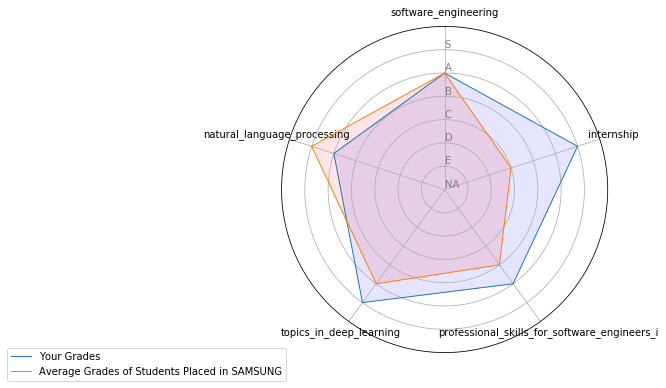

In [30]:
# ------- PART 1: Create background
 
# number of variable
list_course = ['software_engineering', 'internship', 'professional_skills_for_software_engineers_i', 'topics_in_deep_learning', 'natural_language_processing']
'''for i in range(0,5):
    a = input("enter course "+ str(i+1) +": ")
    list_course.append(a)
categories=list(df)'''
N = 5
#print(N)

company_name = input("Enter Company Name: ")
indiv_score =[]

for i in range(0,5):
    a = input("enter grade in course "+ list_course[i] +": ")
    indiv_score.append(a)


# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(8, 6))

# Adds subplot on position 1
#ax = fig.add_subplot(111, polar = True)
ax = plt.subplot(111, polar=True)
 

    
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], list_course)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 1, 2, 3, 4, 5 ,6], ["NA","E","D","C","B","A","S"], color="grey", size=10)
plt.ylim(0,7)

 

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
#Ind1
values=df[list_course].loc[company_name].to_list()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Your Grades")
ax.fill(angles, values, 'b', alpha=0.1)
 

indiv_score = change_grade(indiv_score)
values = indiv_score
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Average Grades of Students Placed in "+company_name.upper())
ax.fill(angles, values, 'r', alpha=0.1)

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.03, 0.03))
plt.savefig('spider.png')
